1. Importing libraries 

In [325]:
import re, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, os 

Setting display options

In [326]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

2. Reading the data 

In [327]:
PROJECT_DIR  = "/Users/abhisheksaurav/Desktop/real_estate_project/"
DATA_DIR = "Data Collection/Data/City/chandigarh/cleaned_data"

In [328]:
def get_data(name):
    file_name = "{}.csv".format(name)
    file_path = os.path.join(PROJECT_DIR, DATA_DIR, file_name)
    return pd.read_csv(file_path)

In [329]:
df = get_data("gurgaon_properties_cleaned_v1")

balcony
3+    1218
3     1133
2      966
1      416
No     209
Name: count, dtype: int64

In [331]:
df.head(1)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,house,independent,sector 31,4.25,26235.0,1620.0,Plot area 204(170.57 sq.m.)Built Up area: 200 sq.yards (167.23 sq.m.)Carpet area: 180 sq.yards (150.5 sq.m.),5,5,3+,"store room,pooja room",3.0,North-East,5 to 10 Year Old,"['Hanuman Mandir', 'Icici bank ATM', 'State bank of india ATM', 'Axis bank ATM', 'Hdfc bank ATM', 'State bank of india ATM', 'Icici ATM', 'Citi bank ATM', 'Axis bank ATM', 'Hdfc ATM', 'Axis bank ATM', 'Shivam Hospital Gurgaon', 'Ahmed Hospital Multi Speciality', 'Dispencery', 'Dayal Eye & Maternity Centre', 'Bansal Medicare and Maternity Centre', 'Pushpanjali Hospital', 'Pushpanjali Hospital Gurgaon', 'Kalyani Hospital Gurgaon', 'Medanta', 'Aarvy Hospital', 'Centre For Sight Gurgaon Sector 29', 'Saraswati Hospital Gurgaon', 'Gardian Pharmacy', 'City Medical', 'Gardian Pharmacy', 'IBP Petrol Pump', 'Indian Oil', 'Indian Oil', 'Hdfc bank', 'State bank of india sbi', 'Punjab national bank', 'Om Sweets', 'Fast Food', 'Fast food', 'Bar and restaurant', 'Cafe Coffee Day', 'Darbar', '32nd Milestone', 'Raj Restaurant', 'Dhabba', 'KFC', 'CR Model Public School', 'Salvan Public School', 'St. Angels Jr', 'govt sec school', 'Manav Rachna School', 'Manav Rachna Swimming Pool', 'District library gurgaon']","['10 Wardrobe', '1 Water Purifier', '7 Fan', '1 Exhaust Fan', '6 Geyser', '1 Stove', '16 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']","['Feng Shui / Vaastu Compliant', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'Park', 'Visitor Parking', 'Security Personnel', 'Waste Disposal']"


4. Detailed Analysis

4.1 areaWithType

In [332]:
(df
 .sample(5)[['price','area', 'areaWithType']]
)

,price,area,areaWithType
3700,7.50,3240.0,Plot area 360(301.01 sq.m.)
3142,0.82,830.0,Super Built up area 1400(130.06 sq.m.)Carpet area: 830 sq.ft. (77.11 sq.m.)
253,1.55,1920.0,Super Built up area 1920(178.37 sq.m.)
1171,4.10,1459.0,Super Built up area 2781(258.36 sq.m.)Carpet area: 1459 sq.ft. (135.55 sq.m.)
3396,0.82,1523.0,Super Built up area 1523(141.49 sq.m.)Built Up area: 1221.18 sq.ft. (113.45 sq.m.)


In [333]:
# function to extract the Super built up area 

def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [334]:
# function to extract the built up area or carpet area 

def get_area(text, area_type):
    match = (re
             .search(area_type + r'\s*:\s*(\d+\.?\d*)', 
                     text)
    )
    if match:
        return float(match
                     .group(1))
    return None

In [335]:
# this function checks if the area is in sq.m and converts to square feet if needed 

def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value


In [336]:
# extracting super built up area and converting it into sq_ft if needed 

df['super_built_up_area'] = (df
                             .areaWithType
                             .apply(get_super_built_up_area)
)
df['super_built_up_area'] = (df
                             .apply(lambda x: convert_to_sqft(x['areaWithType'], 
                                                              x['super_built_up_area']), 
                                                              axis=1)
)

In [337]:
# extracting built up area and converting it if needed 

df['built_up_area'] = (df
                       .areaWithType
                       .apply(lambda x: get_area(x, 'Built Up area')))

df['built_up_area'] = (df
                       .apply(lambda x: convert_to_sqft(x['areaWithType'], 
                                              x['built_up_area']), axis = 1))

In [338]:
# extracting carpet area and converting it if needed 

df['carpet_area'] = (df 
                     .areaWithType 
                     .apply(lambda x: get_area(x, "Carpet area")))

df["carpet_area"] = (df
                     .apply(lambda x: convert_to_sqft(x['areaWithType'], 
                                                      x['carpet_area']), axis= 1)
                        )

In [339]:
df[['price', 'property type', 'price_per_sq_ft', 'area', 'areaWithType','super_built_up_area', 'built_up_area', 'carpet_area']].sample(5)

,price,property type,price_per_sq_ft,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3522,0.80,flat,5797.0,1380.0,Super Built up area 1380(128.21 sq.m.)Built Up area: 1300 sq.ft. (120.77 sq.m.)Carpet area: 1200 sq.ft. (111.48 sq.m.),1380.0,1300.0,1200.0
1240,1.98,flat,9036.0,2191.0,Super Built up area 2191(203.55 sq.m.),2191.0,NaN,NaN
3914,10.00,house,37037.0,2700.0,Plot area 2700(250.84 sq.m.)Built Up area: 9500 sq.ft. (882.58 sq.m.)Carpet area: 9000 sq.ft. (836.13 sq.m.),NaN,9500.0,9000.0
3405,0.45,flat,4500.0,1000.0,Super Built up area 1000(92.9 sq.m.),1000.0,NaN,NaN
1903,1.65,flat,7857.0,2100.0,Super Built up area 2100(195.1 sq.m.)Carpet area: 1720 sq.ft. (159.79 sq.m.),2100.0,NaN,1720.0


In [340]:
(
    df 
    .duplicated() 
    .sum()
)

np.int64(125)

- now there are 125 duplicate rows. 

In [341]:
# checking the rows in which we don't have 'Super built up area', ' Built up area' or 'carpet area' 

df[~(df['super_built_up_area'].isnull() | df['built_up_area'].isnull() | df['carpet_area'].isnull())].sample(3)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
3076,flat,unitech fresco,sector 50,1.82,9912.0,1836.0,Super Built up area 1836(170.57 sq.m.)Built Up area: 1830 sq.ft. (170.01 sq.m.)Carpet area: 1500 sq.ft. (139.35 sq.m.),3,3,3+,others,14.0,east,5 to 10 Year Old,"['Rapid Metro Station Sector 55 56', 'M3M Cosmopolitan', 'Golf Course Ext Rd', 'The Paras World School', 'Park Hospital', 'IGI Airport', ""McDonald's India"", 'SkyJumper Trampoline Park']","['5 Fan', '1 Exhaust Fan', '3 Geyser', '1 Stove', '12 Light', '5 AC', '1 Chimney', '3 Curtains', '1 Modular Kitchen', '3 Wardrobe', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1836.0,1830.0,1500.0
693,flat,la vida by tata housing,sector 113,1.65,10449.0,1579.0,Super Built up area 1579(146.69 sq.m.)Built Up area: 1420 sq.ft. (131.92 sq.m.)Carpet area: 1220 sq.ft. (113.34 sq.m.),3,2,2,not available,3.0,north-east,1 to 5 Year Old,"['Dwarka Sector 21', 'Pacific D21 Mall', 'Bajghera Road', 'Dwarka Expy', 'Euro International School, Sector- 109.', 'The NorthCap University', ""Rion's Hospital"", 'Indira Gandhi Intl Airport', 'Bijwasan Railway Station']","['2 Geyser', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1579.0,1420.0,1220.0
2687,flat,dlf the ultima,sector 81,2.40,11257.0,2132.0,Super Built up area 2132(198.07 sq.m.)Built Up area: 1800 sq.ft. (167.23 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),3,3,2,servant room,10.0,north-west,1 to 5 Year Old,"['Huda Metro Station (Gurugram)', 'Vatika Town Square-INXT', 'Manesar Road', 'NH 48', 'Euro International School, Sec 84', 'SGT University', 'Miracles Apollo Cradle Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']","['1 Water Purifier', '8 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '4 Geyser', '10 Light', '1 Curtains', '1 Modular Kitchen', '1 Chimney', '4 AC', '3 Wardrobe', '1 Washing Machine', 'No Bed', 'No Microwave', 'No Sofa', 'No Stove', 'No TV']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2132.0,1800.0,1400.0


In [342]:
df[~(df['super_built_up_area'].isnull() | df['built_up_area'].isnull() | df['carpet_area'].isnull())].shape

(537, 20)

- there are 537 such rows where we have he all the values of super built up area, built up area and carpet area. 
- out of 3942 records for various flats there are only 537 rows in which we have all the values related to built up area 
- this means that 3405 rows in which atleast one of these values is missing, we will use these 537 rows to fill those values 

In [343]:
# checking the rows in which we have plot area, for these rows the super_built_up_area, built_up_area, carpet_area will be missing 

(
    df[df 
    .areaWithType 
    .str 
    .contains("Plot")][['price', 'property type', 'price_per_sq_ft', 'area', 'areaWithType','super_built_up_area', 'built_up_area', 'carpet_area']]
    #.sample(5)
    .shape

)

(749, 8)

- there are 748 rows in which we have plot area. 

In [344]:
# checking for count of missing values in the 'super_built_up_area', 'built_up_area' and 'carpet_area'

df[['super_built_up_area', 'built_up_area', 'carpet_area']].isnull().sum()

super_built_up_area    2008
built_up_area          2713
carpet_area            1941
dtype: int64

Out of 3942 rows - 
- super built up area has 2008 missing values
- built up area has 2713 missing values 
- carpet area has 1941 mising values 

In [345]:
# extracting and converting to dataframe for those rows in which 'super_built_up_area', 'built_up_area' and 'carpet_area' is missing 

all_nan_df = (
    df[(df 
    .super_built_up_area 
    .isnull()) & ( 
        df 
        .built_up_area 
        .isnull() & (
            df 
            .carpet_area 
            .isnull()
        )
    )][['price', 'property type', 'area', 'areaWithType','super_built_up_area', 'built_up_area', 'carpet_area']] 
    # .sample(3)
    # .shape
)

In [346]:
(
    all_nan_df
    .head()
)

,price,property type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,12.5,house,3078.0,Plot area 342(285.96 sq.m.),NaN,NaN,NaN
9,5.5,house,1800.0,Plot area 200(167.23 sq.m.),NaN,NaN,NaN
10,5.0,house,2367.0,Plot area 263(219.9 sq.m.),NaN,NaN,NaN
15,1.0,house,126.0,Plot area 126(11.71 sq.m.),NaN,NaN,NaN
17,4.5,house,1350.0,Plot area 150(125.42 sq.m.),NaN,NaN,NaN


- super_built_up_area	built_up_area	carpet_area are missing in only those rows where we have the record of the independent houses and for those records we have the plot area 
- our next goal is to extract those plot areas for the independent houses

In [347]:
# storing the index values for the records where the super_built_up_area	built_up_area	carpet_area is missing 

all_nan_df_index = (
    df[(df 
    .super_built_up_area 
    .isnull()) & ( 
        df 
        .built_up_area 
        .isnull() & (
            df 
            .carpet_area 
            .isnull()
        )
    )][['price', 'property type', 'area', 'areaWithType','super_built_up_area', 'built_up_area', 'carpet_area']] 
    .index
)

In [348]:
# creating function for extracting the plot area 

def extract_plot_area(area_with_type):
    match = re.search(r"Plot area (\d+\.?\d*)", area_with_type)
    if match : 
        return float(match.group(1))
    else: 
        return None 

In [349]:
# here we are extracting the plot area and putting it into the built up area as for the independent house case the plot area is quite similar to the built up area

all_nan_df['built_up_area'] = (
    all_nan_df
    .areaWithType
    .apply(extract_plot_area)
)

In [350]:
all_nan_df.sample(5)

,price,property type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3764,8.25,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.0,NaN
1093,12.50,house,2430.0,Plot area 270(225.75 sq.m.),NaN,270.0,NaN
3674,3.60,house,1728.0,Plot area 192(160.54 sq.m.),NaN,192.0,NaN
3464,2.75,house,1557.0,Plot area 173(144.65 sq.m.),NaN,173.0,NaN
1897,27.50,house,11286.0,Plot area 1254(1048.5 sq.m.),NaN,1254.0,NaN


- here, there is some discrepancy in the plot area as some are in square feet,  square yard and square meter. 
- to fix this issue we need to convert those plot areas who are in square yards and square meter to square feets
- we will use the following formula 
    - square feet = 9 * square yard 
    - square feet = 10.7 * square meter 

In [351]:
# scale conversion formula function 

def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else: 
        if round(row['area']/ row['built_up_area']) == 9.0: 
            return row['built_up_area'] * 9 
        elif round(row['area']/row['built_up_area']) == 11.0: 
            return row['built_up_area'] * 10.7 
        else: 
            return row['built_up_area']

In [352]:
# converting the scale 

all_nan_df['built_up_area'] = (
    all_nan_df 
    .apply(convert_scale, axis = 1)
)

In [353]:
all_nan_df.sample(5)

,price,property type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
460,1.30,house,1125.0,Plot area 1125(104.52 sq.m.),NaN,1125.00,NaN
3509,0.38,house,900.0,Plot area 900(83.61 sq.m.),NaN,900.00,NaN
942,15.50,house,4518.0,Plot area 502(419.74 sq.m.),NaN,4518.00,NaN
2226,7.00,house,1783.0,Plot area 1782.72(165.62 sq.m.),NaN,1782.72,NaN
2847,1.45,house,26032.0,Plot area 26000(2415.48 sq.m.),NaN,26000.00,NaN


In [354]:
# updating the original dataframe with these values 

df.update(all_nan_df)

In [355]:
df[['super_built_up_area', 'built_up_area', 'carpet_area']].isnull().sum()

super_built_up_area    2008
built_up_area          2113
carpet_area            1941
dtype: int64

- by using the above operations we significantly reduced the number of missing values in the built up area. 
- earlier the missing values in the built up area was around 2713 which has now reduced to 2113. 

In [356]:
# current state of our dataframe

df.sample(3)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
2307,house,nirvana country,sector 50,10.00,14285.0,7000.0,Built Up area: 7000 (650.32 sq.m.),5,7,2,servant room,4.0,East,5 to 10 Year Old,"['Standard chartered ATM', 'Icici bank ATM', 'Vatsalya Clinic', 'Bones Clinic - Orthopaedics', 'Meher Clinic', 'Dr. Naresh Pandita', 'Dr. Anuj Sharma', 'Vishesh Dental', 'Skin Clinic', 'Neelkanth Health Care', 'Park Hospital Gurgaon', 'Divine Look Clinic Centre', 'Dr. Aruna Kalra', 'Wellness Eye Centre', 'Best Urologist Atcomplete Family Clinic', 'Sukhmani Hospital Pvt. Ltd', 'Ekta Hospital', 'Sai Heart and Trauma Center', 'Wembley estate club', 'Genius', 'Gardian Pharmacy', 'Apollo Pharmacy', 'SPAZE BUSINESS PARK', 'Unitech', 'India Oil', 'Hdfc bank', 'Icici bank', 'Hdfc bank', 'Hdfc bank', 'Indusind bank', 'Hdfc bank', 'SRS Cinemas', 'India', 'Madison and Pike', 'Haldiram', ""Domino's Pizza"", ""Nirula's"", 'Starbucks', 'Nook', 'Kamla International', 'Gurugram University', 'Delhi Public School Primary Section', 'Amity Global School', 'Manav Rachna School', 'Manav Rachna Swimming Pool']","['1 Water Purifier', '5 Fan', '1 Fridge', '7 Geyser', '1 Stove', '5 Light', '12 AC', '1 Modular Kitchen', '1 Chimney', '4 Bed', '5 Wardrobe', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Sofa', 'No TV', 'No Washing Machine']",['Piped-gas'],NaN,7000.0,NaN
462,flat,mrg skyline,sector 106,1.82,13392.0,1359.0,Built Up area: 1359 (126.26 sq.m.)Carpet area: 952 sq.ft. (88.44 sq.m.),3,2,2,not available,4.0,east,undefined,"['Chintapurni Mandir', 'State bank ATM', 'R K Hospital Gurgaon', 'Chirag Hospital Pvt. Ltd', 'Bhardwaj Hospital', 'Dr. Hitesh Dawar', 'Kalyan Hospital Gurgaon', 'Sneh Hospital Gurgaon', 'Jiya Clinic', 'Dr. Mittal Clinic', 'Prateek Nursing Home And Polyclinic', ""Dr. Anurag's Child Care Clinic"", 'Yashroop Medical Centre', 'Dr. Sindhu Clinic', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Kr Dental Hub', 'Shree Krishna Hospital Gurgaon', 'Sarvodya Hospital', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,1359.0,952.0
2958,flat,essel tower,sector 28,2.20,12500.0,1760.0,Carpet area: 1760 (163.51 sq.m.),3,4,3+,servant room,3.0,na,5 to 10 Year Old,"['Dlf phase 1 metro station', 'Sikandarpur metro station', 'Sikanderpur metro station', 'Sikandarpur rmrg metro station', 'Mg road metro station', 'Hanuman Mandir', 'Kotak mahindra bank ATM', 'Axis bank ATM', 'Standard chartered ATM', 'Rbs ATM', 'Icici bank ATM', 'Divine Look Clinic Centre 1', 'Sidhesh Hospital Gurgaon', 'Lord Krishna Hospital', 'Sitaram Bhartia', 'Marwah Clinic', 'Sikka Maternity And Surgical Center', 'Uma Sanjeevani Health Centre And Hospital', 'Surgi Center Clinic', 'Religare Wellness', '98.4', 'Chikitsa', 'Guardian', 'Guardian Pharmacy', 'Emaar Business Park', 'PVR Cinames', 'DT Cinemas', 'PVR Metropolitan', 'Axis bank', 'Axis bank', 'Hdfc bank', 'Lord krishna bank', 'Indusind bank', 'Abn amro bank', 'Kotak mahindra bank', 'Hsbc bank', 'Food Court', 'Nowhere Brewpub and cafe', 'Fat', 'Dighent cafe', 'Blue Tokai Coffee Roasters', 'Starbucks', 'Belgian Waffle', 'Drunken Monkey', 'CCD', 'Barbecue Grill', 'NutrioBox Gurugram', 'Bahrisons library']","['1 Water Purifier', '5 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '4 Geyser', '1 Stove', '6 Light', '1 Chimney', '1 Curtains', '4 AC', '1 TV', '1 Modular Kitchen', '3 Wardrobe', '3 Bed', '1 Sofa', '1 Microwave', '1 Washing Machine']",NaN,NaN,NaN,1760.0


4.2 additional rooms

In [357]:
(
    df 
    .additionalRoom
    .value_counts()
)

additionalRoom
not available                                    1681
servant room                                      709
study room                                        251
others                                            236
pooja room                                        170
store room                                        107
study room,servant room                           100
pooja room,servant room                            83
pooja room,study room,servant room,store room      71
servant room,others                                59
pooja room,study room,servant room                 57
pooja room,study room,servant room,others          56
servant room,pooja room                            38
servant room,store room                            34
study room,others                                  30
pooja room,study room                              24
pooja room,others                                  17
pooja room,store room                              17
servant room,

- since there are multiple combinations of the extra rooms available but broadly these rooms are divided into 5 categories
    - servent room 
    - pooja room 
    - others 
    - store room 
    - study room 
- now we will create 5 extra rooms based on these columns which is a kind of one hot encoding for thesee values 

In [358]:
# list of new cols to be created 
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# populating the new col based on the list 
for col in new_cols: 
    df[col] = (
        df['additionalRoom']
        .str 
        .contains(col) 
        .astype(int)
    )


In [359]:
(
    df 
    .sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]
)

,additionalRoom,study room,servant room,store room,pooja room,others
3880,servant room,0,1,0,0,0
3670,"pooja room,servant room",0,1,0,1,0
2301,"pooja room,store room",0,0,1,1,0
1158,"pooja room,store room,study room,servant room",1,1,1,1,0
293,"pooja room,servant room",0,1,0,1,0


4.4 agePossession 

In [360]:
( 
    df 
    .agePossession
    .value_counts()
)

agePossession
1 to 5 Year Old       1702
5 to 10 Year Old       604
0 to 1 Year Old        550
undefined              358
10+ Year Old           345
Under Construction      92
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Aug 2023                 7
Dec 2025                 7
Jun 2024                 7
Nov 2023                 5
Aug 2024                 5
Oct 2023                 4
Jul 2024                 4
By 2025                  4
Sep 2023                 4
Jan 2025                 4
May 2024                 3
Feb 2024                 3
Nov 2024                 3
Mar 2025                 2
Sep 2025                 2
Jun 2027                 2
Dec 2026                 2
Jul 2025                 2
Jan 2026                 2
Apr 2026                 2
Jul 2027                 2
Aug 2025      

In [361]:
def cateorize_age_possession(value):

    categories = {
        "New Property": ["0 to 1 Year Old", "Within 6 months", "Within 3 months"],
        "Relatively New": ["1 to 5 Year Old"],
        "Moderately Old": ["5 to 10 Year Old"],
        "Old Property": ["10+ Year Old"],
        "Under Construction": ["Under Construction", "By"]}
    
    if pd.isna(value):
        return 'undefined'

    for category, keywords in categories.items(): 
        if any(keyword in value for keyword in keywords):
            return category
    
    try: 
        if int(value.split(" ")[-1]):
            return "Under Construction" 
    except ValueError: 
        pass 
 
    return "undefined"
        

In [362]:
df['agePossession'] = (
    df 
    .agePossession 
    .apply(cateorize_age_possession)
)

In [363]:
(
    df 
    .agePossession 
    .value_counts()
)

agePossession
Relatively New        1702
New Property           646
Moderately Old         604
undefined              359
Old Property           345
Under Construction     286
Name: count, dtype: int64

- the number of columns in the agePossession category has significantly reduced now. 
- it's reduced to 5 categories 

4.5 furnish details 

In [364]:
(
    df[['furnishDetails','features']]
    .sample(5)
)

,furnishDetails,features
1620,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN
3172,"['4 Wardrobe', '4 Light', '7 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
506,NaN,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
1935,"['1 Fan', '3 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Maintenance Staff', 'Park', 'Visitor Parking', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
632,"['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Geyser', '6 Light', '1 Modular Kitchen', '1 Curtains', 'No AC', 'No Bed', 'No Chimney', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"


In [365]:

all_furnishings = []
for details in df['furnishDetails'].dropna():
    furnishings= (details.replace("[", '').replace(']', '').replace("'", "").split(","))
    all_furnishings.extend(furnishings)

In [366]:
unique_furnishings = list(set(all_furnishings))

In [367]:
for furnishing in unique_furnishings[:5]: 
    print(furnishing)


 3 AC
 No Curtains
 1 Exhaust Fan
8 Wardrobe


In [368]:
columns_to_include = []

for furnishing in unique_furnishings:
    columns_to_include.append(re.sub(r"No |\d+", "", furnishing).strip())
    

In [369]:
columns_to_include = list(set(columns_to_include))

In [370]:
columns_to_include = [i for i in columns_to_include if i]

In [371]:
columns_to_include

['Fridge',
 'Washing Machine',
 'Water Purifier',
 'Modular Kitchen',
 'Stove',
 'Wardrobe',
 'Bed',
 'Light',
 'Curtains',
 'Exhaust Fan',
 'Sofa',
 'TV',
 'Chimney',
 'AC',
 'Microwave',
 'Dining Table',
 'Geyser',
 'Fan']

In [372]:
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details: 
            return 0 
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match: 
            return int(match.group(1))
        elif furnishing in details: 
            return 1 
    return 0 

In [373]:
for furnishing in columns_to_include:
    df[furnishing] = df.furnishDetails.apply(lambda x: get_furnishing_count(x, furnishing))

In [374]:
# creating a new dataframe with required columns 

furnish_df = df[['furnishDetails'] + columns_to_include]

In [375]:
furnish_df.sample(5)

,furnishDetails,Fridge,Washing Machine,Water Purifier,Modular Kitchen,Stove,Wardrobe,Bed,Light,Curtains,Exhaust Fan,Sofa,TV,Chimney,AC,Microwave,Dining Table,Geyser,Fan
1162,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
973,"['2 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
1185,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1680,"['5 Fan', '1 Exhaust Fan', '3 Geyser', '10 Light', '5 AC', '1 Chimney', '1 Modular Kitchen', '3 Wardrobe', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0,0,0,1,0,3,0,10,0,1,0,0,1,5,0,0,3,5
473,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [376]:
furnish_df.drop(columns= ['furnishDetails'], inplace= True)

/var/folders/_r/sndd4_s924d6z4fgsvt_v31r0000gn/T/ipykernel_79439/65960383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnish_df.drop(columns= ['furnishDetails'], inplace= True)


In [377]:
furnish_df.sample(5)

,Fridge,Washing Machine,Water Purifier,Modular Kitchen,Stove,Wardrobe,Bed,Light,Curtains,Exhaust Fan,Sofa,TV,Chimney,AC,Microwave,Dining Table,Geyser,Fan
3906,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1592,0,0,0,0,1,0,0,0,0,0,0,0,1,4,0,0,0,0
3393,0,0,0,1,0,2,0,4,0,0,0,0,0,0,0,0,1,4
1325,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1
760,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0


- now for every flat we have feature details which are available on that flat 
- based on this we will try to categorise the columns that are furnished, semi furnished and unfurnished
- we will use clustering algorith to categorize this. 

In [378]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [379]:
# scaling the data 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnish_df)

In [380]:
wcss_reduced = []

for i in range(1, 11): 
    kmeans = KMeans(n_clusters= i, init= "k-means++", random_state= 42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

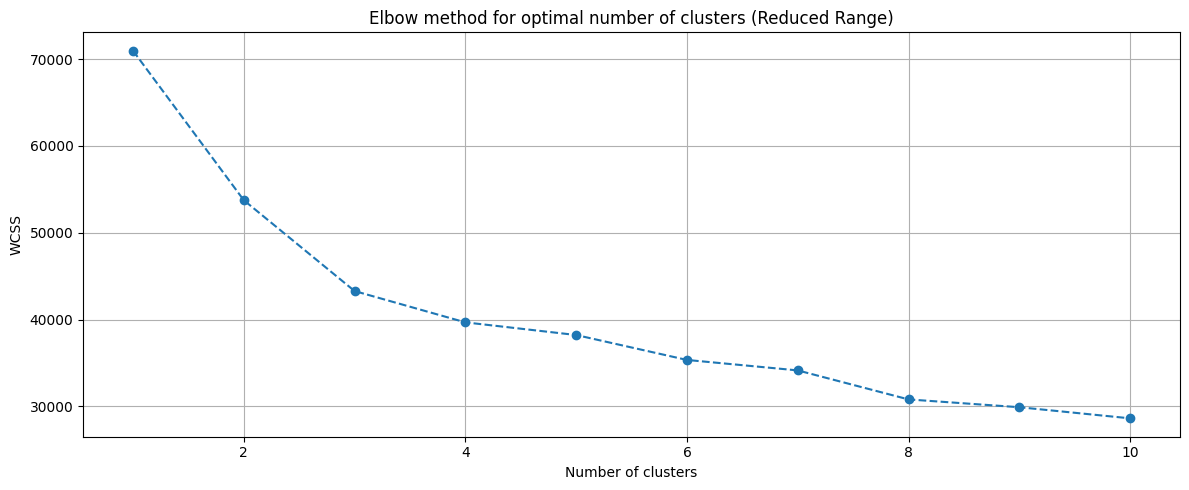

In [381]:
# plotting the results 

plt.figure(figsize= (12, 5))
plt.plot(range(1, 11), wcss_reduced, marker = 'o', linestyle = '--')
plt.title("Elbow method for optimal number of clusters (Reduced Range)")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.tight_layout()
plt.show()


- from here we can see there is not a sharper decline at 3. so that satisifes our assumption that there are three category of furnishing styles in flats. 

In [382]:
n_clusters = 3 
kmeans = KMeans(n_clusters= n_clusters, random_state= 42) 
kmeans.fit(scaled_data)

cluster_assignments = kmeans.predict(scaled_data)

In [383]:
cluster_assignments

array([2, 0, 2, ..., 0, 0, 0], dtype=int32)

- now we will add these cluster labels to the main cleaned data 

In [384]:
df = df.iloc[:, :-18]
df['furnishing_type'] = cluster_assignments

In [385]:
df[['furnishDetails', 'furnishing_type']][df[['furnishDetails', 'furnishing_type']]['furnishing_type'] ==1].sample(3)

,furnishDetails,furnishing_type
1020,"['1 Water Purifier', '3 Fan', '1 Fridge', '1 Exhaust Fan', '2 Geyser', '1 Stove', '4 Light', '1 Curtains', '1 Modular Kitchen', '1 Chimney', '2 Bed', '1 Sofa', '1 Washing Machine', 'No AC', 'No Dining Table', 'No Microwave', 'No TV', 'No Wardrobe']",1
1641,"['1 Water Purifier', '4 Fan', '1 Exhaust Fan', '1 Dining Table', '3 Geyser', '6 Light', '2 AC', '1 TV', '1 Curtains', '2 Bed', '2 Wardrobe', '1 Sofa', 'No Chimney', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Stove', 'No Washing Machine']",1
147,"['1 Water Purifier', '6 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '6 Geyser', '1 Stove', '19 Light', '6 AC', '5 TV', '1 Modular Kitchen', '1 Chimney', '5 Curtains', '4 Wardrobe', '1 Sofa', '1 Washing Machine', '1 Microwave', 'No Bed']",1


In [386]:
df[['furnishDetails', 'furnishing_type']][df[['furnishDetails', 'furnishing_type']]['furnishing_type'] ==2].sample(3)

,furnishDetails,furnishing_type
878,"['12 Fan', '1 Exhaust Fan', '6 Geyser', '24 Light', '3 Chimney', '1 Modular Kitchen', '6 Wardrobe', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",2
2645,"['7 Fan', '1 Exhaust Fan', '3 Geyser', '10 Light', '3 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",2
2921,"['36 Fan', '51 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",2


In [387]:
df[['furnishDetails', 'furnishing_type']][df[['furnishDetails', 'furnishing_type']]['furnishing_type'] ==0].sample(3)

,furnishDetails,furnishing_type
3806,NaN,0
2229,NaN,0
3708,NaN,0


- from observing on the `furnishDetails` column and the `furnishing_types` we can conclude the following: 
    - 0 is for furnished 
    - 1 is for semi furnished 
    - 2 is for unfurnished

4.6 Features 

In [388]:
df[['features']].sample(5)

,features
1158,"['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Water Storage', 'Piped-gas', 'Visitor Parking', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
2619,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
3639,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
3725,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Club house / Community Center']"
2251,"['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


- so this column has information related to the amneties with the flats

In [389]:
(
    df[['features']]
    .isnull()
    .sum()
)

features    701
dtype: int64

- we have scraped the data for the apartments as well so based on the society in this dataframe we will join the dataframe with the apartments dataframe which will eventually help us filling the missing values 

In [390]:
# reading the apartments data 

apartments = get_data("appartments")

In [391]:
apartments.sample(3)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
240,M3M My Den,"1 BHK Service Apartment, 2 BHK Apartment, 1 RK Studio Apartment in Sector 67, Gurgaon","['Unitech Business Zone', 'Park Hospital', 'Omaxe Gurgaon Mall', 'Delhi Public School Gurugram Sector 67A', 'Sector 55-56 Metro Station']","{'Unitech Business Zone': '4 KM', 'Park Hospital': '4.1 KM', 'Omaxe Gurgaon Mall': '4.8 KM', 'Delhi Public School Gurugram Sector 67A': '1.5 KM', 'Sector 55-56 Metro Station': '7 KM', 'Samrat Mihir Bhoj Road': '100 Meter', 'Sushant University': '8.3 KM', 'Indira Gandhi Intl Airport': '24.1 KM', 'Badshahpur Sohna Rd Hwy': '3.8 KM', 'Grand Hyatt Gurgaon': '6.1 KM', 'Golf Pavilion': '13 KM', 'Tau DeviLal Sports Complex': '8.2 KM', 'De Adventure Park': '4.3 KM'}",https://www.99acres.com/m3m-my-den-sector-67-gurgaon-npxid-r324825,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,360.67 sq.ft.', 'price-range': '₹ 2.05 Cr'}, '1 RK': {'building_type': 'Studio Apartment', 'area_type': 'Super Built-up Area', 'area': '874.13 - 892.24 sq.ft.', 'price-range': '₹ 1.36 - 1.39 Cr'}, '1 BHK': {'building_type': 'Service Apartment', 'area_type': 'Super Built-up Area', 'area': '892 - 904 sq.ft.', 'price-range': '₹ 1.39 - 1.41 Cr'}}","['Food Court', 'Concierge Service', 'Infinity Pool', 'Swimming Pool', 'Football', 'Bar/Chill-Out Lounge', 'Business Lounge', 'Laundry', 'Reading Lounge']"
216,Zara Aavaas,"1, 2, 3 BHK Apartment in Sector 104, Gurgaon","['Mps World School', 'Northern Peripheral Road', 'Tomar Hospital', 'HUDA Mini Golf Course', 'F9 Go Karting Gurgaon']","{'Mps World School': '0.8 Km', 'Northern Peripheral Road': '3.3 Km', 'Tomar Hospital': '3.5 Km', 'HUDA Mini Golf Course': '6.8 Km', 'F9 Go Karting Gurgaon': '6.9 Km', ""Oyster's Water Park"": '9.4 Km', 'Taj City Centre Hotel': '9.6 Km', 'DPG Institute of Technology': '10.9 Km', 'Ardee Mall': '11.4 Km', 'Indira Gandhi International Airport': '20.2 Km'}",https://www.99acres.com/zara-aavaas-sector-104-gurgaon-npxid-r170643,"{'1 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '301.28 sq.ft.', 'price-range': 'Price on Request'}, '2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '497.98 sq.ft.', 'price-range': 'Price on Request'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '763 sq.ft.', 'price-range': 'Price on Request'}}","['Swimming Pool', 'Reading Lounge', 'Card Room', 'Sauna', 'Steam Room', 'Cafeteria', 'Billiards', 'Shopping Centre', 'Basketball Court']"
242,DLF Princeton Estate,"2, 3, 4 BHK Apartment in DLF Phase 5, Gurgaon","['Sector 42-43 Metro Station', 'Paras Hospital', 'Ardee Mall', 'Zooper India Trampoline Park', 'DLF Golf and Country Club']","{'Sector 42-43 Metro Station': '1.8 Km', 'Paras Hospital': '2 Km', 'Ardee Mall': '2.6 Km', 'Zooper India Trampoline Park': '3.1 Km', 'DLF Golf and Country Club': '3.7 Km', 'The Shri Ram School Aravali': '3.9 Km', 'Taj City Centre Gurugram': '4 Km', 'Appu Ghar Water Park': '4.7 Km', 'PVR Drive in Theatre': '7.4 Km', 'Golf Course Ext Rd': '7.6 Km', 'Duke Horse Riding Club': '8 Km', 'Surajgarh Gurgaon': '9.2 Km', 'Indira Gandhi International Airport': '15.2 Km'}",https://www.99acres.com/dlf-princeton-estate-dlf-phase-5-gurgaon-npxid-r11712,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '964 sq.ft.', 'price-range': '₹ 1.35 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,127 sq.ft.', 'price-range': '₹ 1.55 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,562 sq.ft.', 'price-range': '₹ 2.15 Cr'}}","['Swimming Pool', 'Medical Centre', 'Laundry', 'Salon', 'Grocery Shop', 'Property Staff', 'Shopping Centre', 'Table Tennis', 'Badminton Court']"


In [392]:
# converting property type to lowercase in order to match with the society name in our data 

apartments.PropertyName = apartments.PropertyName.str.lower()

In [393]:
(
    apartments
    .PropertyName 
    .sample(4)
)

100        central park resorts
169           orchid ivy floors
72     emaar mgf the palm drive
82      adani m2k oyster grande
Name: PropertyName, dtype: object

In [394]:
# extracting those features which have null values in our data 

temp_df = (
    df[df['features']
    .isnull()]
)

In [395]:
temp_df.shape

(701, 26)

In [396]:
x = temp_df.merge(apartments, left_on= "society", right_on= "PropertyName", how = "left")["TopFacilities"]

In [397]:
df.loc[temp_df.index, 'features'] = x.values 

In [398]:
(
    df 
    .features 
    .isnull()
    .sum()
)

np.int64(544)

- so previously, there were 701 missing values which has now reduced to 544

In [399]:
(
    df 
    .features 
    .sample(3)
)

186                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    ['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']
2404    ['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant 

- now since features have many values and it's logically right also. there are many apartments which can offer various kinds of amneties which are unique. 
- now based on the amenieties importance we will assign them weights which will be eventually used to get the luxary score for the apartments

In [400]:
# finding out how many different amneties are present 
# features have lists which contains the various elements provided by the variaous apartments. 
# we will convert them to actaul list in order to extract unique amneties so that we can assign them weights 

import ast 

df['feature_list'] = (
    df 
    .features 
    .apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])
)

In [401]:
# now we are using MultiLabelBinarizer to convert the feature list into the binary matrix
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['feature_list'])

# converting the binary matrix into the dataframe 

features_binary_df = pd.DataFrame(features_binary_matrix, columns= mlb.classes_)

In [402]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
940,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1049,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0
906,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1726,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1766,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [403]:
features_binary_df.shape

(3942, 130)

- there are 130 unique amneties provided by various flats. now we will assign them weights

In [404]:
# define the weights for each feature as provided 
# assigning weights as per percieved luxary contributions

weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}

In [405]:
# calculating luxary score for each row 

luxary_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis = 1)

In [406]:
# addding this luxary score to the original dataframe 

df['luxary_score'] = luxary_score

In [407]:
df.sample(3)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,feature_list,luxary_score
740,flat,smart world gems,sector 89,1.01,9156.0,1103.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,study room,4.0,na,Under Construction,"['Sant Soordas Sihi Metro Station', 'Airia Mall', 'Dwarka Expressway', 'Pataudi Road', 'NH-8', 'KMP Expressway', 'RPS International School', 'Genesis Hospital Sector 84', 'Gurgaon Railway Station', 'Vatika Business Park Sector 49', 'Holiday Inn Gurugram Sector 90', 'De Adventure Amusement Park', 'National Tennis Academy Sector 98', 'IMT Manesar']",NaN,"['Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Piped-gas', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,1103.0,1,0,0,0,0,0,"[Intercom Facility, Lift(s), Swimming Pool, Park, Piped-gas, Internet/wi-fi connectivity, Fitness Centre / GYM, Club house / Community Center]",38
1796,flat,tata primanti,sector 72,5.25,15648.0,3355.0,Super Built up area 3355(311.69 sq.m.)Built Up area: 3000 sq.ft. (278.71 sq.m.)Carpet area: 2800 sq.ft. (260.13 sq.m.),4,4,3+,servant room,30.0,north-east,New Property,"['Sector 55-56 Metro Station', 'Omaxe City Centre', 'Sohna Gurgaon Road', 'Faridabad Gurgaon Road', 'Pallavan PreSchool, Sohna Road', 'RBSM Public school', 'Polaris Hospital', 'Spaze Itech Park', 'Radisson Hotel Gurugram Sohna Road', 'SkyJumper Trampoline Park Gurgaon']","['4 Wardrobe', '1 Water Purifier', '5 Fan', '1 Exhaust Fan', '6 Geyser', '1 Stove', '6 Light', '1 Modular Kitchen', '6 AC', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",3355.0,3000.0,2800.0,0,1,0,0,0,2,"[Centrally Air Conditioned, Water purifier, Security / Fire Alarm, Power Back-up, Feng Shui / Vaastu Compliant, Private Garden / Terrace, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, Separate entry for servant room, No open drainage around, Bank Attached Property, Piped-gas, Internet/wi-fi connectivity, Recently Renovated, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Low Density Society, Waste Disposal, Rain Water Harvesting, Water softening plant, Shopping Centre, Fitness Centre / GYM, Club house / Community Center]",174
2884,flat,signature global park,sector 163,0.95,7850.0,1210.0,Built Up area: 1210 (112.41 sq.m.),3,2,3+,not available,3.0,east,New Property,"['Sector 55-56 metro', 'Global city centre', 'Sohna road dhunela', 'Gd goenka university', 'Maharana pratap school', 'Vardaan hospital and trauma centre', 'Indira Gandhi International Airport', 'Garhi harsaru railway station Gurgaon']",[],"['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,1210.0,NaN,0,0,0,0,0,0,"[Security / Fire Alarm, Lift(s), Maintenanc

In [408]:
# dropping the unnecessary columns 

df.drop(columns= ['nearbyLocations','furnishDetails','features','feature_list','additionalRoom'],inplace=True)

In [409]:
df.sample(3)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score
636,flat,signature global park,sector 163,0.65,7299.0,891.0,Built Up area: 822 (76.37 sq.m.)Carpet area: 520 sq.ft. (48.31 sq.m.),2,2,3,1.0,na,New Property,NaN,822.0,520.0,0,0,0,0,0,0,58
1625,house,shivpuri,sector 5,2.40,8889.0,2700.0,Plot area 300(250.84 sq.m.),10,5,3,2.0,North,Old Property,NaN,2700.0,NaN,1,1,0,1,0,0,8
3017,flat,dlf the primus,sector 82,1.59,10338.0,1538.0,Super Built up area 1799(167.13 sq.m.)Carpet area: 1538 sq.ft. (142.88 sq.m.),3,3,3+,5.0,north-east,Relatively New,1799.0,NaN,1538.0,0,0,0,0,1,1,167


In [410]:
df.shape 

(3942, 23)

In [411]:
dir_path = "/Users/abhisheksaurav/Desktop/real_estate_project/Data Collection/Data/City/chandigarh/cleaned_data"
file_name = "gurgaon_properties_cleaned_v2"
df.to_csv("{}/{}.csv".format(dir_path, file_name), index = False)

In [412]:
df.balcony.value_counts()

balcony
3+    1218
3     1133
2      966
1      416
No     209
Name: count, dtype: int64